# MU4MEF04 –Méthodes Numériques pour les écoulements incompressibles- S1
## TP6 Opérateur de Stokes
### Master SPI – MSH
#### ZHOU Zixin 28609845

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.sparse as sp
import math

#### On considère l'équation de Stokes
$$
\frac{d^{2} u}{d x^{2}}+\frac{d p}{d x}=0
$$
#### sur [0,1] avec les conditions aux limites
$$
\begin{array}{l}
u(0)=0 \\
u(1)=1
\end{array}
$$
#### avec la condition d'incompressibilité
$$
\frac{d u}{d x}=0
$$
### 1. Discrétiser les équations $(1)-(4)$ sur une grille de $\mathrm{N}=50$ points en identifiant la vitesse et la pression aux mêmes points. Donner la taille de la matrice globale M. Montrer que M peut se mettre sous la forme d'une matrice par blocs
$$
M=[A B ; C D]
$$
### Identifier chaque opérateur $\mathrm{A}, \mathrm{B}, \mathrm{C}, \mathrm{D}$


In [2]:
# Maillage centré
N = 50

dx=1./ (N - 1)

A = ((1./dx) ** 2.) * sp.diags([1.,-2.,1.], [-1,0,1], (N, N)).toarray() 

A[0,:] = np.zeros(N)
A[N-1,:] = np.zeros(N)
A[0,0] = 1
A[N - 1, N - 1] = 1


B = (1./dx/2.) * sp.diags([-1.,0,1.], [-1,0,1], (N, N)).toarray() 
B[0,:] = np.zeros(N)
B[N-1,:] = np.zeros(N)


C = (1./dx/2.) * sp.diags([-1.,0,1.], [-1,0,1], (N, N)).toarray() 
C[0,:] = np.zeros(N)
C[N-1,:] = np.zeros(N)
C[0,0] = - 1./dx
C[0,1] = 1./dx
C[N - 1, N - 2] = - 1./dx
C[N - 1, N - 1] = 1./dx

D = np.zeros((N,N))

print u'Opérateur A',A
print u'Opérateur B',B
print u'Opérateur C',C
print u'Opérateur D',D

Mt = np.hstack((A,B))
Mb = np.hstack((C,D))
M  = np.vstack((Mt,Mb))          
             
print'Matrice M',M

Opérateur A [[ 1.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 2.401e+03 -4.802e+03  2.401e+03 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  2.401e+03 -4.802e+03 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ... -4.802e+03  2.401e+03  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  2.401e+03 -4.802e+03  2.401e+03]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  1.000e+00]]
Opérateur B [[  0.    0.    0.  ...   0.    0.    0. ]
 [-24.5   0.   24.5 ...   0.    0.    0. ]
 [  0.  -24.5   0.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...   0.   24.5   0. ]
 [  0.    0.    0.  ... -24.5   0.   24.5]
 [  0.    0.    0.  ...   0.    0.    0. ]]
Opérateur C [[-49.   49.    0.  ...   0.    0.    0. ]
 [-24.5   0.   24.5 ...   0.    0.    0. ]
 [  0.  -24.5   0.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...   0.   24.5   0. ]
 [  0.    0.    0.  ... -24.5   0.   24.5]
 [  0.    0.    0.  ...   0.  -49.  

### 2. Effectuer la décomposition aux valeurs singulières de l'opérateur en utilisant la commande svd. et obtenir les matrices $u, D,$ et $v$ telles que $[u, D, v]=\operatorname{svd}(M) .$ Quelle est la dimension du noyau de $\mathrm{M} ?$ Représenter les modes associés aux valeurs singulières nulles qui constituent la base du noyau de l'opérateur et commenter.


In [3]:
# Centrée
[u_c, D_c, v_ct] = np.linalg.svd(M)

v_c = v_ct.transpose()
print 'Matrice D',D_c

Matrice D [9.59425172e+03 9.56504674e+03 9.51650450e+03 9.44882352e+03
 9.36228054e+03 9.25722945e+03 9.13409974e+03 8.99339481e+03
 8.83568979e+03 8.66162923e+03 8.47192441e+03 8.26735038e+03
 8.04874274e+03 7.81699421e+03 7.57305089e+03 7.31790835e+03
 7.05260749e+03 6.77823022e+03 6.49589495e+03 6.20675197e+03
 5.91197860e+03 5.61277437e+03 5.31035595e+03 5.00595211e+03
 4.70079858e+03 4.39613293e+03 4.09318933e+03 3.79319346e+03
 3.49735735e+03 3.20687434e+03 2.92291407e+03 2.64661765e+03
 2.37909286e+03 2.12140956e+03 1.87459531e+03 1.63963107e+03
 1.41744727e+03 1.20891998e+03 1.01486746e+03 8.36046922e+02
 6.73151677e+02 5.26808550e+02 3.97575751e+02 2.85941205e+02
 1.92321518e+02 1.17063207e+02 6.04327745e+01 2.28153288e+01
 3.43485870e+00 9.89737225e-01 9.85215373e-01 9.73736765e-01
 9.73559545e-01 9.63478837e-01 9.52792302e-01 9.44968195e-01
 9.37294141e-01 9.20813414e-01 9.02765750e-01 8.82821100e-01
 8.61303149e-01 8.38242088e-01 8.13775343e-01 7.88002073e-01
 7.61034972e-0

#### Ici, on trouve que il y a deux numbres (le dèrnier et avant dèrnier numbres) dans D_c est prèsque nulle(e-13). Donc la dimension du noyau de M égale 2. 

#### Ensuit, on va représanter le dèrnier(i=100) et avant dèrnier(i=99) colones dans V_c. Les premiers 50 numbres concernent u et les restes concernent p.

<function matplotlib.pyplot.show>

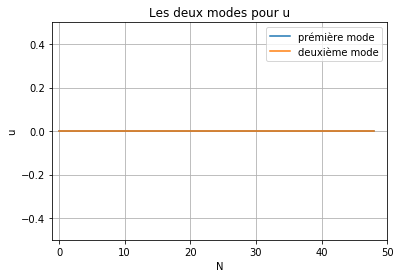

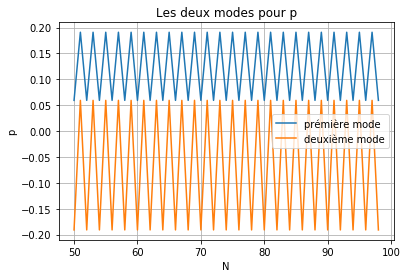

In [4]:
x=np.linspace(0, 2 * N - 1, 2 * N)

# Mode pour u
plt.figure()
plt.xlabel("N")
plt.ylabel("u")
plt.axis([-1,50,-0.5,0.5])
plt.grid()
plt.plot(x[0:49], v_c[0:49,99], label=u"prémière mode")
plt.plot(x[0:49], v_c[0:49,98], label=u"deuxième mode")
plt.title("Les deux modes pour u")
plt.legend() 
plt.show

# Mode pour p
plt.figure()
plt.xlabel("N")
plt.ylabel("p")
plt.grid()
plt.plot(x[50:99], v_c[50:99,99], label=u"prémière mode")
plt.plot(x[50:99], v_c[50:99,98], label=u"deuxième mode")
plt.title("Les deux modes pour p")
plt.legend() 
plt.show

#### Pour u, on trouve qu'il y a une seul mode, le mode constant: u = 0.
#### Pour p, on trouve qu'il y a deux modes, le mode constant, et le mode parasite: $p _{i,j} = (-1)^{i+j}$. 
#### Les résultats sont cohérents avec nous avons trouvé dans le cours.

#### Ici dans le graphe, les deux courbes correspondent les combinaisons linéaires des deux modes:$ p_{i,j} = \lambda p_{constant} + \beta (-1)^{i+j}$ où $ \lambda $ et $ \beta $ sont deux constantes.



### 3. Discrétiser le problème en utilisant deux grilles distinctes pour la vitesse et la pression comme vu dans le cours. Quelle est la dimension du noyau du nouvel opérateur M? Représenter les modes du noyau de l'opérateur et conclure.

In [5]:
# Maillage décentré
N = 50

dx=1./ (N - 1)

A = ((1./dx) ** 2.) * sp.diags([1.,-2.,1.], [-1,0,1], (N, N)).toarray() 

A[0,:] = np.zeros(N)
A[N-1,:] = np.zeros(N)
A[0,0] = 1
A[N - 1, N - 1] = 1


B = (1./dx) * sp.diags([-1.,1.], [-1,0], (N, N - 1)).toarray() 
B[0,:] = np.zeros(N-1)
B[N-1,:] = np.zeros(N-1)


C = (1./dx) * sp.diags([-1.,1.], [0,1], (N - 1, N)).toarray() 

D = np.zeros((N-1,N-1))

print u'Opérateur A',A
print u'Opérateur B',B
print u'Opérateur C',C
print u'Opérateur D',D
             
             
Mt = np.hstack((A,B))
Mb = np.hstack((C,D))
M  = np.vstack((Mt,Mb))         

print'Matrice M',M

Opérateur A [[ 1.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 2.401e+03 -4.802e+03  2.401e+03 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  2.401e+03 -4.802e+03 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ... -4.802e+03  2.401e+03  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  2.401e+03 -4.802e+03  2.401e+03]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  1.000e+00]]
Opérateur B [[  0.   0.   0. ...   0.   0.   0.]
 [-49.  49.   0. ...   0.   0.   0.]
 [  0. -49.  49. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... -49.  49.   0.]
 [  0.   0.   0. ...   0. -49.  49.]
 [  0.   0.   0. ...   0.   0.   0.]]
Opérateur C [[-49.  49.   0. ...   0.   0.   0.]
 [  0. -49.  49. ...   0.   0.   0.]
 [  0.   0. -49. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  49.   0.   0.]
 [  0.   0.   0. ... -49.  49.   0.]
 [  0.   0.   0. ...   0. -49.  49.]]
Opérateur D [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

In [6]:
# Décentrée
[u_d, D_d, v_dt] = np.linalg.svd(M)

v_d = v_dt.transpose()

print 'Matrice D',D_d

Matrice D [9.59525056e+03 9.56604242e+03 9.51749492e+03 9.44980660e+03
 9.36325424e+03 9.25819176e+03 9.13504872e+03 8.99432853e+03
 8.83660642e+03 8.66252700e+03 8.47280162e+03 8.26820542e+03
 8.04957410e+03 7.81780045e+03 7.57383070e+03 7.31866051e+03
 7.05333090e+03 6.77892390e+03 6.49655804e+03 6.20738372e+03
 5.91257842e+03 5.61334177e+03 5.31089058e+03 5.00645376e+03
 4.70126718e+03 4.39656852e+03 4.09359210e+03 3.79356373e+03
 3.49769557e+03 3.20718109e+03 2.92319007e+03 2.64686373e+03
 2.37930996e+03 2.12159876e+03 1.87475778e+03 1.63976811e+03
 1.41756025e+03 1.20901040e+03 1.01493688e+03 8.36097001e+02
 6.73184144e+02 5.26825206e+02 3.97578462e+02 2.85931897e+02
 1.92302181e+02 1.17035919e+02 6.03997521e+01 2.27808596e+01
 3.39875904e+00 9.99895791e-01 9.99895470e-01 9.99894930e-01
 9.99894170e-01 9.99893178e-01 9.99891954e-01 9.99890476e-01
 9.99888748e-01 9.99886729e-01 9.99884436e-01 9.99881801e-01
 9.99878856e-01 9.99875501e-01 9.99871787e-01 9.99867569e-01
 9.99862924e-0

#### Ici, on trouve que il y a une seul numbre (le dèrnier) dans D_d est prèsque nulle(e-15). Donc la dimension du noyau de M égale 1. 

#### Ensuit, on va représanter le dèrnier colone(i=99) dans V_d. Les premiers 50 numbres concernent u et les restes concernent p.¶

<function matplotlib.pyplot.show>

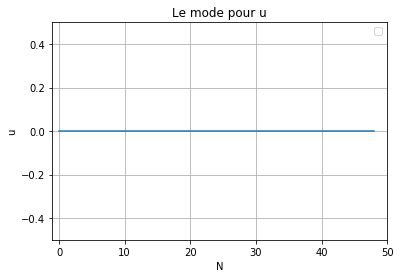

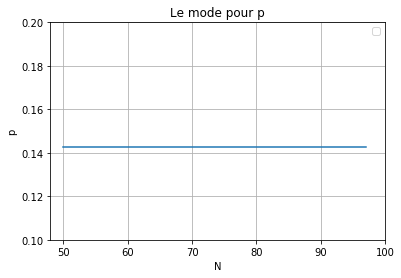

In [7]:
x=np.linspace(0, 2 * N - 2, 2 * N - 1)

# Mode pour u
plt.figure()
plt.xlabel("N")
plt.ylabel("u")
plt.axis([-1,50,-0.5,0.5])
plt.grid()
plt.plot(x[0:49], v_d[0:49,98])
plt.title("Le mode pour u")
plt.legend() 
plt.show

# Mode pour p
plt.figure()
plt.xlabel("N")
plt.ylabel("p")
plt.axis([48,100,0.1,0.2])
plt.grid()
plt.plot(x[50:98], v_d[50:98,98])
plt.title("Le mode pour p")
plt.legend() 
plt.show

#### Dans ce cas, il n'y pas de mode parasite.
#### Pour u, on trouve qu'il y a une seul mode : le mode constant u = 0.
#### Pour p, on trouve qu'il y a une seul mode : le mode constant p = 0.14285714.
